<a href="https://colab.research.google.com/github/vikpy/DLSem3/blob/master/Assignment_4_Experimenting_with_Initializers_and_other_hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build model for CIFAR100, MNIST, Fashion MNIST (test data - accuracy of +80%) - plot metrics accuracy, sparse_cat_acc, top_k, categorical_acc, sparse_topk

#Use activation as layers in the model EarlyStopping and ModelCheckPoint


In [50]:
import keras
from keras.datasets import cifar100, fashion_mnist, mnist
from keras.models import Sequential                         
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
def scale_and_reshape(X_train, X_test, y_train, y_test, number_of_categorical_values=10):
  
  if len(X_train.shape) == 4:
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3])
  elif len(X_train.shape) == 3:
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])   

  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  #preprocess
  X_train /=  255.0
  X_test /= 255.0

  y_train = to_categorical(y_train, number_of_categorical_values)  
  y_test = to_categorical(y_test, number_of_categorical_values)

  return X_train, X_test, y_train, y_test

#Cifar **100** 

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
shape_feature = X_train.shape
X_train, X_test, y_train, y_test = scale_and_reshape(X_train, X_test, y_train,\
                                                     y_test, \
                                                     number_of_categorical_values=100)

initializers = keras.initializers.lecun_uniform()
#initializers = keras.initializers.glorot_normal()
#initializers = keras.initializers.glorot_uniform()
#initializers = keras.initializers.he_uniform()


model = Sequential()
model.add(Dense(1000, input_dim=shape_feature[1]*shape_feature[2]*shape_feature[3], activation="relu"))
model.add(Dense(1000, activation="relu", kernel_initializer=initializers, bias_initializer=initializers))
model.add(Dense(1000, activation="relu", kernel_initializer=initializers, bias_initializer=initializers))
model.add(Dense(100,  activation="softmax"))
#compile
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=["categorical_accuracy"])
model.fit(X_train, y_train, epochs=10, batch_size =32, validation_split=0.2, verbose=1)

Epoch 1/10
1250/1250 [==============================] - 33s 26ms/step - loss: 4.2276 - categorical_accuracy: 0.0641 - val_loss: 3.9788 - val_categorical_accuracy: 0.1030
Epoch 2/10
1250/1250 [==============================] - 33s 26ms/step - loss: 3.8299 - categorical_accuracy: 0.1195 - val_loss: 3.7523 - val_categorical_accuracy: 0.1309
Epoch 3/10
1250/1250 [==============================] - 33s 26ms/step - loss: 3.6523 - categorical_accuracy: 0.1494 - val_loss: 3.6633 - val_categorical_accuracy: 0.1439
Epoch 4/10
1250/1250 [==============================] - 33s 26ms/step - loss: 3.5376 - categorical_accuracy: 0.1735 - val_loss: 3.5694 - val_categorical_accuracy: 0.1604
Epoch 5/10
1250/1250 [==============================] - 33s 26ms/step - loss: 3.4449 - categorical_accuracy: 0.1901 - val_loss: 3.4821 - val_categorical_accuracy: 0.1819
Epoch 6/10
1250/1250 [==============================] - 32s 26ms/step - loss: 3.3648 - categorical_accuracy: 0.2020 - val_loss: 3.4493 - val_categoric

#MNIST



In [62]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
shape_feature = X_train.shape
X_train, X_test, y_train, y_test = scale_and_reshape(X_train, X_test, y_train,\
                                                     y_test, \
                                                     number_of_categorical_values=10)

initializers = keras.initializers.lecun_uniform()



model = Sequential()
model.add(Dense(1000, input_dim=shape_feature[1]*shape_feature[2], activation="relu"))
model.add(Dense(1000, activation="relu", kernel_initializer=initializers, bias_initializer=initializers))
model.add(Dense(1000, activation="relu", kernel_initializer=initializers, bias_initializer=initializers))
model.add(Dense(10,  activation="softmax"))
#compile
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=["categorical_accuracy"])

# Fit the model 
filepath="mnist.{epoch:02d}-{val_loss:.2f}.hdf5"
earlystopping = EarlyStopping(monitor='val_loss', verbose=1, patience=5, mode="min")
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, mode="max")
model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1, callbacks=[earlystopping, checkpoint])

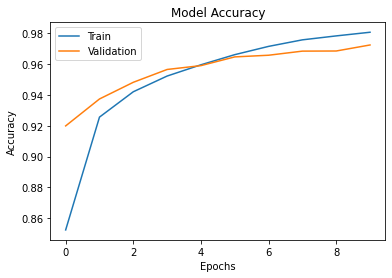

In [58]:
import matplotlib.pyplot as plt
plt.plot(model.history.history["categorical_accuracy"])
plt.plot(model.history.history["val_categorical_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"], loc="best")
plt.show()

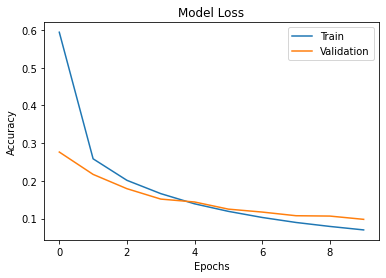

In [59]:
import matplotlib.pyplot as plt
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"], loc="best")
plt.show()

In [64]:
model = Sequential()
model.add(Dense(1000, input_dim=shape_feature[1]*shape_feature[2], activation="relu"))
model.add(Dense(1000, activation="relu", kernel_initializer=initializers, bias_initializer=initializers))
model.add(Dense(1000, activation="relu", kernel_initializer=initializers, bias_initializer=initializers))
model.add(Dense(10,  activation="softmax"))

model.load_weights('/content/mnist.10-0.10.hdf5')
#compile
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=["categorical_accuracy"])
scores = model.evaluate(X_test, y_test, verbose=1)
print(scores)

313/313 [==============================] - 2s 6ms/step - loss: 0.0924 - categorical_accuracy: 0.9715
[0.09238516539335251, 0.9714999794960022]


# Fashion MNIST

In [65]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
shape_feature = X_train.shape
X_train, X_test, y_train, y_test = scale_and_reshape(X_train, X_test, y_train,\
                                                     y_test, \
                                                     number_of_categorical_values=10)

initializers = keras.initializers.lecun_uniform()


model = Sequential()
model.add(Dense(1000, input_dim=shape_feature[1]*shape_feature[2], activation="relu"))
model.add(Dense(1000, activation="relu", kernel_initializer=initializers, bias_initializer=initializers))
model.add(Dense(1000, activation="relu", kernel_initializer=initializers, bias_initializer=initializers))
model.add(Dense(10,  activation="softmax"))
#compile
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=["categorical_accuracy"])

# Fit the model 
filepath="fashion_mnist.{epoch:02d}-{val_loss:.2f}.hdf5"
earlystopping = EarlyStopping(monitor='val_loss', verbose=1, patience=5, mode="min")
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, mode="max")
model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1, callbacks=[earlystopping, checkpoint])

Epoch 1/10
1500/1500 [==============================] - ETA: 0s - loss: 0.7042 - categorical_accuracy: 0.7707
Epoch 00001: saving model to fashion_mnist.01-0.50.hdf5
1500/1500 [==============================] - 27s 18ms/step - loss: 0.7042 - categorical_accuracy: 0.7707 - val_loss: 0.4993 - val_categorical_accuracy: 0.8253
Epoch 2/10
1498/1500 [============================>.] - ETA: 0s - loss: 0.4691 - categorical_accuracy: 0.8369
Epoch 00002: saving model to fashion_mnist.02-0.45.hdf5
1500/1500 [==============================] - 27s 18ms/step - loss: 0.4690 - categorical_accuracy: 0.8369 - val_loss: 0.4511 - val_categorical_accuracy: 0.8418
Epoch 3/10
1500/1500 [==============================] - ETA: 0s - loss: 0.4215 - categorical_accuracy: 0.8525
Epoch 00003: saving model to fashion_mnist.03-0.41.hdf5
1500/1500 [==============================] - 27s 18ms/step - loss: 0.4215 - categorical_accuracy: 0.8525 - val_loss: 0.4122 - val_categorical_accuracy: 0.8522
Epoch 4/10
1500/1500 [===

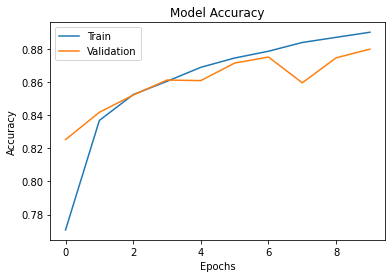

In [66]:
plt.plot(model.history.history["categorical_accuracy"])
plt.plot(model.history.history["val_categorical_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"], loc="best")
plt.show()

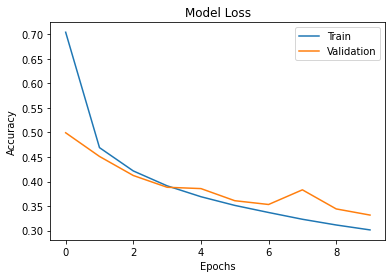

In [67]:
import matplotlib.pyplot as plt
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"], loc="best")
plt.show()

In [68]:
model = Sequential()
model.add(Dense(1000, input_dim=shape_feature[1]*shape_feature[2], activation="relu"))
model.add(Dense(1000, activation="relu", kernel_initializer=initializers, bias_initializer=initializers))
model.add(Dense(1000, activation="relu", kernel_initializer=initializers, bias_initializer=initializers))
model.add(Dense(10,  activation="softmax"))

model.load_weights('/content/fashion_mnist.10-0.33.hdf5')
#compile
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=["categorical_accuracy"])
scores = model.evaluate(X_test, y_test, verbose=1)
print(scores)

313/313 [==============================] - 2s 5ms/step - loss: 0.3559 - categorical_accuracy: 0.8697
[0.35588592290878296, 0.869700014591217]
